In [1]:
install.packages("tidyr")
install.packages("psych")

library("psych")
library("tidyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




## wczytanie danych

In [4]:
dane <- read.csv2("/content/ceny_produktow_rolniczych.csv")
head(dane)

,X,Okresy,Rok,ziarno.zbóż..bez.siewnego....jęczmień.za.1dt,ziarno.zbóż..bez.siewnego....pszenżyto.za.1dt,ziarno.zbóż..bez.siewnego....owies.za.1dt,ziarno.zbóż..bez.siewnego....kukurydza.za.1dt,żywiec.rzeźny...bydło..bez.cieląt..za.1.kg.wagi.żywej,mleko.krowie.za.1.hl
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,styczeń,2018,67.59,62.06,52.01,59.65,6.58,142.12
2,8,luty,2018,67.33,61.37,52.29,60.46,6.47,135.24
3,15,marzec,2018,67.08,61.86,51.87,61.81,6.34,134.20
4,22,kwiecień,2018,67.35,62.37,51.85,62.35,6.58,132.17
5,29,maj,2018,66.19,62.44,53.30,64.78,6.63,129.20
6,36,czerwiec,2018,65.47,63.72,54.41,67.09,6.49,128.52


In [5]:
names(dane) <- c("x", "miesiąc", "rok", "jęczmień_1dt", "pszenżyto_1dt", "owies_1dt", "kukurydza_1dt", "bydlo_1kg", "mleko_1hl")
names(dane)

[1] "x"             "miesiąc"       "rok"           "jęczmień_1dt" 
[5] "pszenżyto_1dt" "owies_1dt"     "kukurydza_1dt" "bydlo_1kg"    
[9] "mleko_1hl"

In [6]:
head(dane)

,x,miesiąc,rok,jęczmień_1dt,pszenżyto_1dt,owies_1dt,kukurydza_1dt,bydlo_1kg,mleko_1hl
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,styczeń,2018,67.59,62.06,52.01,59.65,6.58,142.12
2,8,luty,2018,67.33,61.37,52.29,60.46,6.47,135.24
3,15,marzec,2018,67.08,61.86,51.87,61.81,6.34,134.20
4,22,kwiecień,2018,67.35,62.37,51.85,62.35,6.58,132.17
5,29,maj,2018,66.19,62.44,53.30,64.78,6.63,129.20
6,36,czerwiec,2018,65.47,63.72,54.41,67.09,6.49,128.52


In [7]:
mleko = na.omit(dane$mleko_1hl)
jeczmien =  na.omit(dane$jęczmień_1dt)
pszenzyto =  na.omit(dane$pszenżyto_1dt)
owies =  na.omit(dane$owies_1dt)
kukurydza =  na.omit(dane$kukurydza_1dt)
bydlo =  na.omit(dane$bydlo_1kg)

## wybór zmiennych objaśniających

Idea doboru zmiennych objaśniających:

• możliwie silnie skorelowane ze zmienną objaśnianą (y)

• możliwie słabo skorelowane między sobą

In [8]:
cor(mleko, jeczmien)
cor(mleko, pszenzyto)
cor(mleko, owies)
cor(mleko, kukurydza)
cor(mleko, bydlo)

[1] 0.7725371

[1] 0.7459087

[1] 0.9232473

[1] 0.663229

[1] 0.9429483

## transformacja danych

### jeczmien

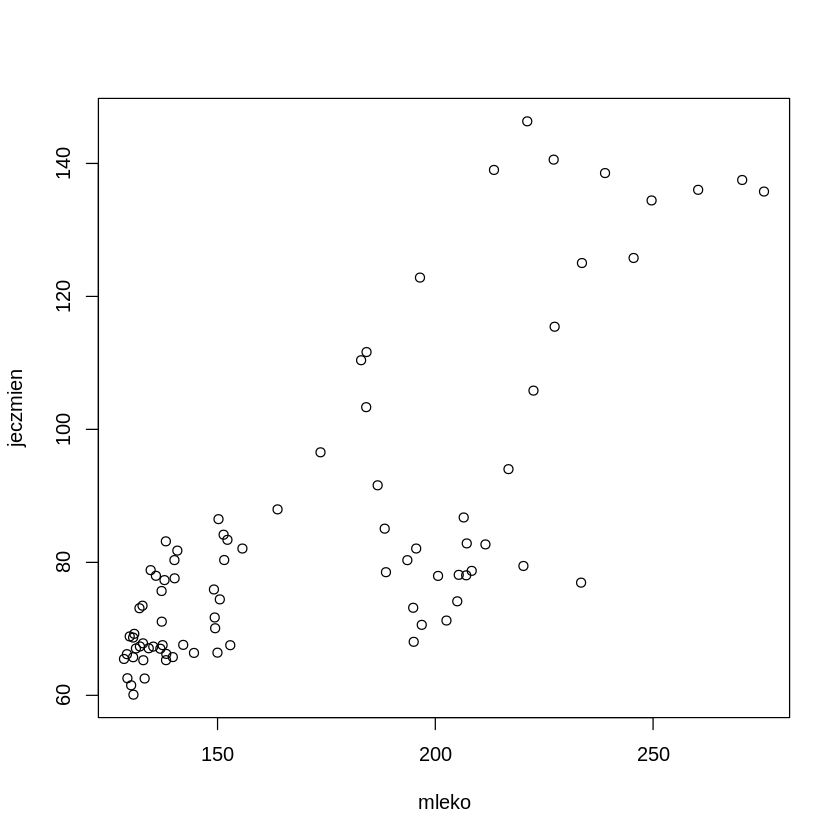

In [15]:
plot(mleko,jeczmien)

zależność nieliniowa

In [21]:
z1 = log(jeczmien)
cor(mleko, z1)

z2 = sqrt(jeczmien)
cor(mleko, z2)

[1] 0.7820173

[1] 0.7782634

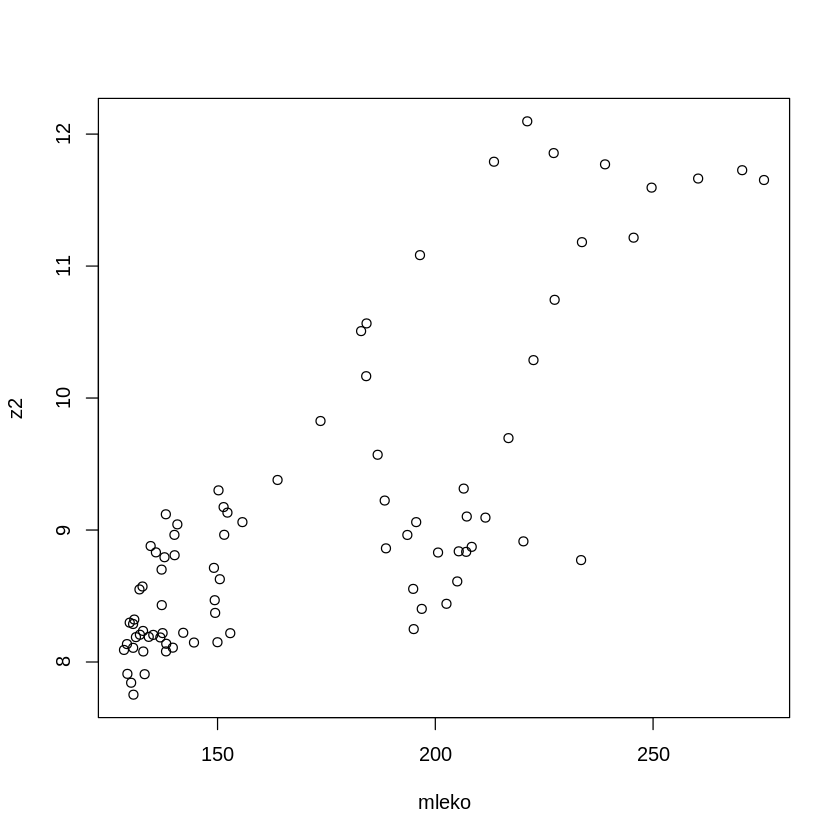

In [22]:
plot(mleko,z2)

### owies


	Pearson's product-moment correlation

data:  mleko and owies
t = 21.627, df = 81, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8834918 0.9497988
sample estimates:
      cor 
0.9232473 


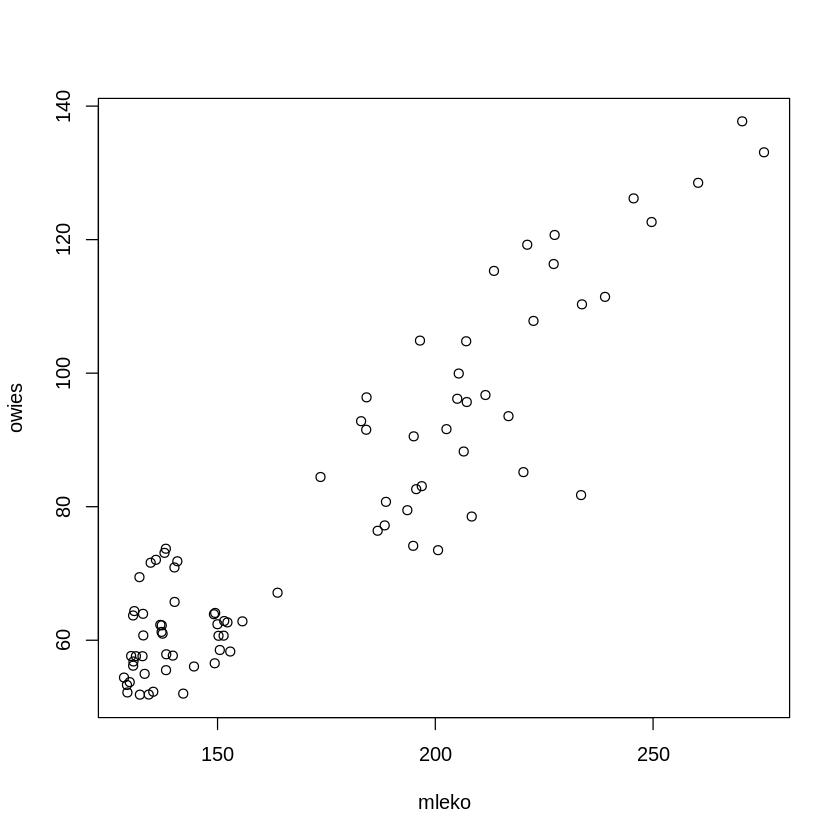

In [36]:
plot(mleko,owies)
cor.test(mleko,owies)

In [37]:
owies_z1 = owies^2
cor.test(mleko,owies_z1)


	Pearson's product-moment correlation

data:  mleko and owies_z1
t = 19.848, df = 81, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8649657 0.9414888
sample estimates:
      cor 
0.9107432 
